# BARATHRAJ .T

# Task-2

02 - Intermediate Level

# Exploratory Data Analysis on Dataset - Terrorism

As a security/defense analyst, try to find out the hot zone of terrorism.

You can choose any of the tool of your choice

(Python/R/Tableau/PowerBI/Excel/SAP/SAS)

In [ ]:
%%html
<style type='text/css'>
.CodeMirror{
    font-size:18px;
</style>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # seaborn is bases on matplot
sns.set(color_codes=True) # adds a nice background
%matplotlib inline # tells python to actually display the graphs
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree
from os import system

UsageError: unrecognized arguments: # tells python to actually display the graphs


In [ ]:
Data = pd.read_csv('globalterrorismdb_0718dist[1].csv',encoding='latin1')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
Data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
Data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [ ]:
Data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
Data.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [ ]:
Data.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,...,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,-0.008114,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.181612,-0.181556,-0.011535,0.001765,-0.192155,-0.044331,-0.149511,0.002790,-0.017745,-0.030631,...,0.054571,0.034843,0.049322,0.016832,-0.555478,1.000000,0.039388,0.040947,0.085055,0.064759
INT_LOG,-0.143600,-0.143601,-0.002302,-0.001540,0.071768,0.069904,-0.082584,-0.099827,0.002272,0.073022,...,0.035821,0.031079,0.007029,-0.045504,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051
INT_IDEO,-0.133252,-0.133253,-0.002034,-0.001621,0.075147,0.067564,-0.071917,-0.094470,0.002268,0.071333,...,0.039053,0.041983,0.013162,-0.039844,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811
INT_MISC,-0.077852,-0.077847,-0.002554,-0.002027,0.027335,0.207281,0.043139,0.097652,0.000371,-0.019197,...,0.023815,0.125162,0.037227,0.129274,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193


In [ ]:
Data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
Data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [ ]:
Data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [ ]:


Data.rename(columns={'eventid':'Eventid', 'iyear':'Year', 'imonth':'Month', 'iday':'Day', 
                          'extended':'Extended', 'resolution':'Resolution',  'attacktype1_txt':'Attacktype', 
                          'country_txt':'Country', 'region_txt':'Region', 'provstate': 'Provstate', 
                          'city':'City', 'crit1':'Crit1', 'crit2':'Crit2', 
                          'crit3':'Crit3', 'multiple':'Multiple', 'success':'Success', 'suicide':'Suicide', 
                          'targtype1_txt':'Targtype', 'natlty1_txt':'Natlty1', 'natlty2_txt':'Natlty2', 
                          'natlty3_txt':'Natlty3', 'gname':'Gname', 'gname2':'Gname2', 'gname3':'Gname3', 
                          'guncertain1':'Guncertain1', 'guncertain2':'Guncertain2', 'guncertain3':'Guncertain3', 
                          'claimed':'Claimed', 'weaptype1_txt':'Weaptype', 'weapsubtype1_txt':'Weapsubtype', 
                          'nkill':'Nkill', 'nkillus':'Nkillus', 'nkillter':'Nkillter', 'nwound':'Nwound', 
                          'nwoundus':'Nwoundus', 'nwoundte':'Nwoundter', 'property':'Property', 
                          'propextent_txt':'Propextent', 'propvalue':'Propvalue', 'ishostkid':'Ishostkid', 
                          'nhostkid':'Nhostkid', 'nhostkidus':'Nhostkidus', 'ransom':'Ransom', 
                          'hostkidoutcome':'Hostkidoutcome', 'nreleased':'Nreleased'},inplace=True)

Data = Data[['Eventid', 'Year','Country', 'Region', 'Provstate', 'City', 'Crit1', 'Crit2', 'Crit3', 
                  'Success', 'Suicide', 'Attacktype', 'Targtype', 'Natlty1','Gname', 'Guncertain1', 
                  'Claimed', 'Weaptype', 'Nkill','Nwound']]

In [ ]:
Data.head(5)

,Eventid,Year,Country,Region,Provstate,City,Crit1,Crit2,Crit3,Success,Suicide,Attacktype,Targtype,Natlty1,Gname,Guncertain1,Claimed,Weaptype,Nkill,Nwound
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,1,1,1,0,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,0.0,NaN,Unknown,1.0,0.0
1,197000000002,1970,Mexico,North America,Federal,Mexico city,1,1,1,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,0.0,NaN,Unknown,0.0,0.0
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,1,1,1,1,0,Assassination,Journalists & Media,United States,Unknown,0.0,NaN,Unknown,1.0,0.0
3,197001000002,1970,Greece,Western Europe,Attica,Athens,1,1,1,1,0,Bombing/Explosion,Government (Diplomatic),United States,Unknown,0.0,NaN,Explosives,NaN,NaN
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,1,1,1,1,0,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,0.0,NaN,Incendiary,NaN,NaN


In [ ]:
Data.isnull().sum()

Eventid            0
Year               0
Country            0
Region             0
Provstate        421
City             434
Crit1              0
Crit2              0
Crit3              0
Success            0
Suicide            0
Attacktype         0
Targtype           0
Natlty1         1559
Gname              0
Guncertain1      380
Claimed        66120
Weaptype           0
Nkill              0
Nwound         16311
dtype: int64

In [ ]:
Data['Nkill']=Data['Nkill'].fillna(0)

Data['Nwound']=Data['Nwound'].fillna(0)

In [ ]:
Data['Casualities'] = Data['Nkill'] + Data['Nwound']

In [ ]:
Data.isnull().sum()

Eventid            0
Year               0
Country            0
Region             0
Provstate        421
City             434
Crit1              0
Crit2              0
Crit3              0
Success            0
Suicide            0
Attacktype         0
Targtype           0
Natlty1         1559
Gname              0
Guncertain1      380
Claimed        66120
Weaptype           0
Nkill              0
Nwound             0
Casualities        0
dtype: int64

In [ ]:
Data.describe()

,Eventid,Year,Crit1,Crit2,Crit3,Success,Suicide,Guncertain1,Claimed,Nkill,Nwound,Casualities
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181311.000000,115571.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,0.988530,0.993093,0.875668,0.889598,0.036507,0.081440,0.049666,2.266860,2.883296,5.150156
std,1.325957e+09,13.259430,0.106483,0.082823,0.329961,0.313391,0.187549,0.273511,1.093195,11.227057,34.309747,40.555416
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.014081e+11,2014.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000
max,2.017123e+11,2017.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1570.000000,8191.000000,9574.000000


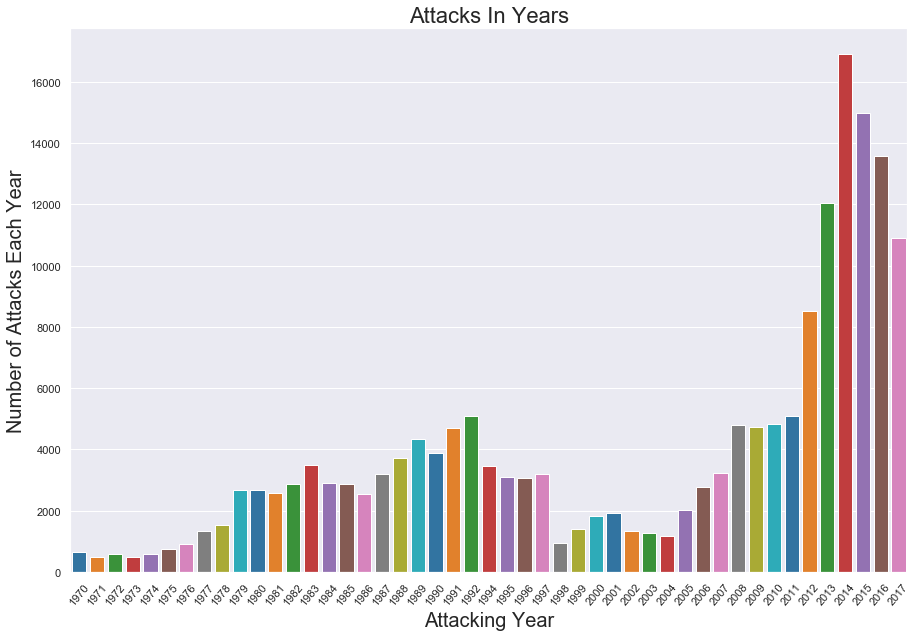

In [ ]:
year = Data['Year'].unique()
years_count = Data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (15,10))
sns.barplot(x=year,y=years_count,palette="tab10")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',Fontsize=20)
plt.title('Attacks In Years',fontsize=22)
plt.show()

Hare The graph shows the number of Attacks in each year from 1970 to 2017. and here we observed that the number of global terrorism attacks are continuously increased from 2011 to 2014 . The Graph shows 2014 is the most unlucky year because the most number of attacks took place in the year 2014.

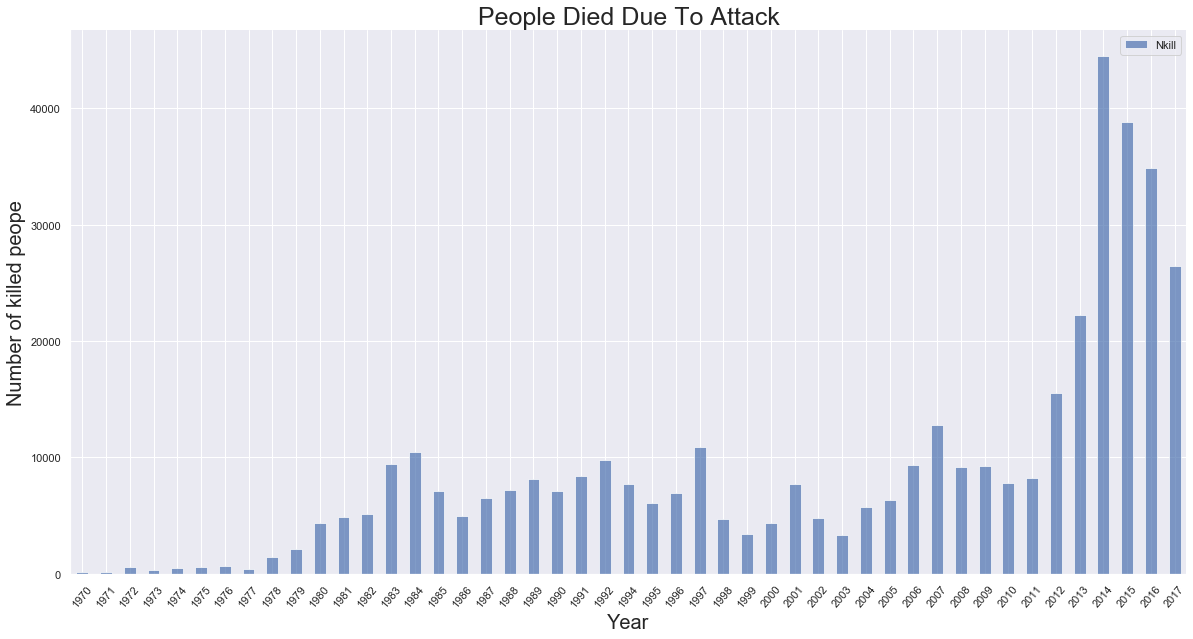

In [ ]:
Data = Data[['Year','Nkill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
Data.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=25)
plt.ylabel("Number of killed peope",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

The graph shows the number of people killed from the year 1970 to 2017. As number of attacks increases, the people killed in attacks is also increases. The number of killed people continuously increased from 2011 to 2014 and most of people killed in 2014.

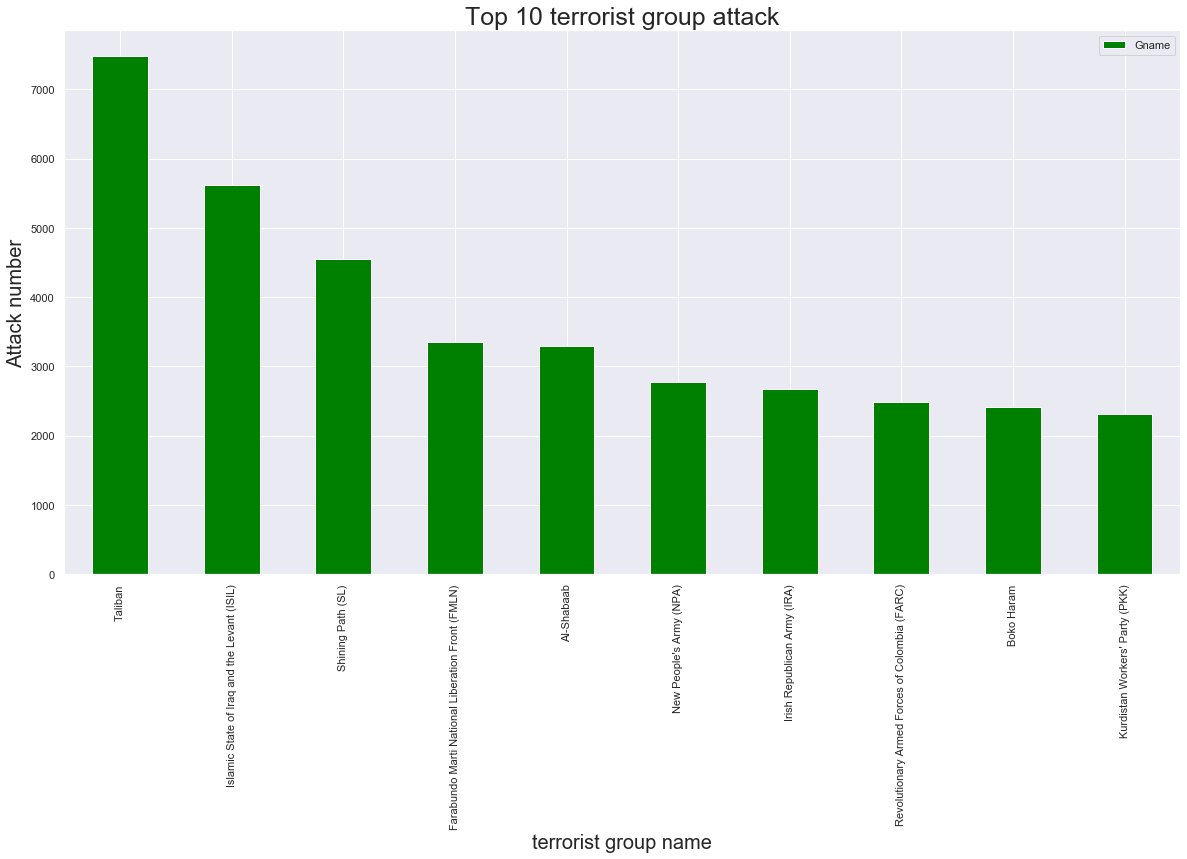

In [ ]:
Data['Gname'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='green',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=25)
plt.xlabel("terrorist group name",fontsize=20)
plt.ylabel("Attack number",fontsize=20)
plt.show()

Here the graph shows the top 10 terrorist group attacks and Taliban is the most active terrorist group followed by the others.

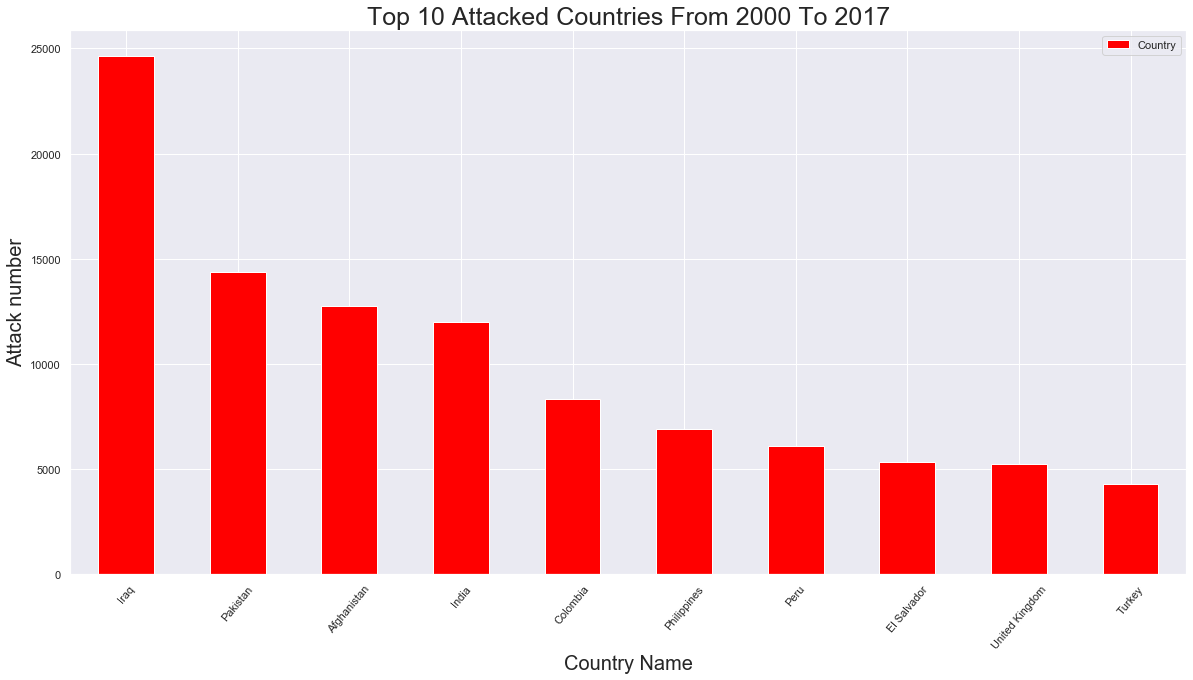

In [ ]:
Data['Country'].value_counts().to_frame().sort_values('Country',axis=0,ascending=False).head(10).plot(kind='bar',color='red',figsize=(20,10))
plt.title("Top 10 Attacked Countries From 2000 To 2017",fontsize=25)
plt.xticks(rotation = 50)
plt.xlabel("Country Name",fontsize=20)
plt.ylabel("Attack number",fontsize=20)
plt.show()

Here the Graph shows the Top 10 Attacked Countries From 2000 To 2017 and Most of the Iraq city is badly affected by the terrorist attacks followed by the others.

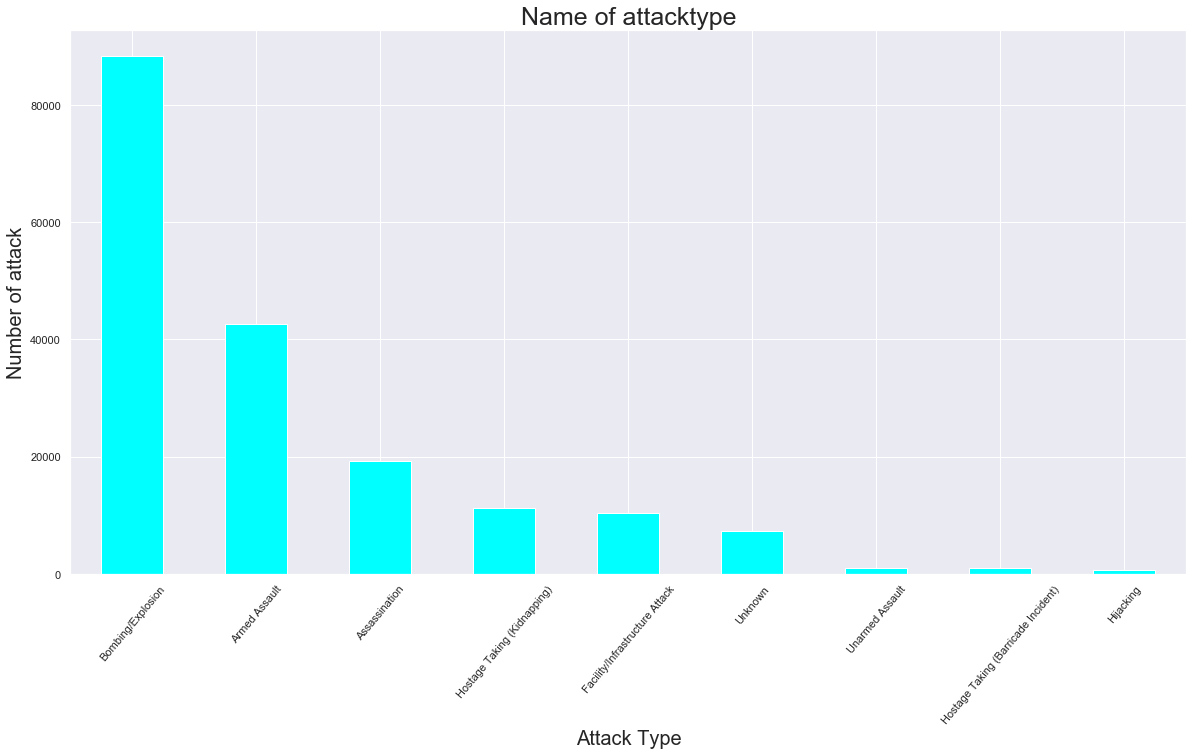

In [ ]:
Data['Attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='cyan')
plt.xticks(rotation = 50)
plt.xlabel("Attack Type",fontsize=20)
plt.ylabel("Number of attack",fontsize=20)
plt.title("Name of attacktype",fontsize=25)
plt.show()


The Graph shows that which type of attack is mostly used. Here we observed that the Bombing/Explosion type attack were used most of time.

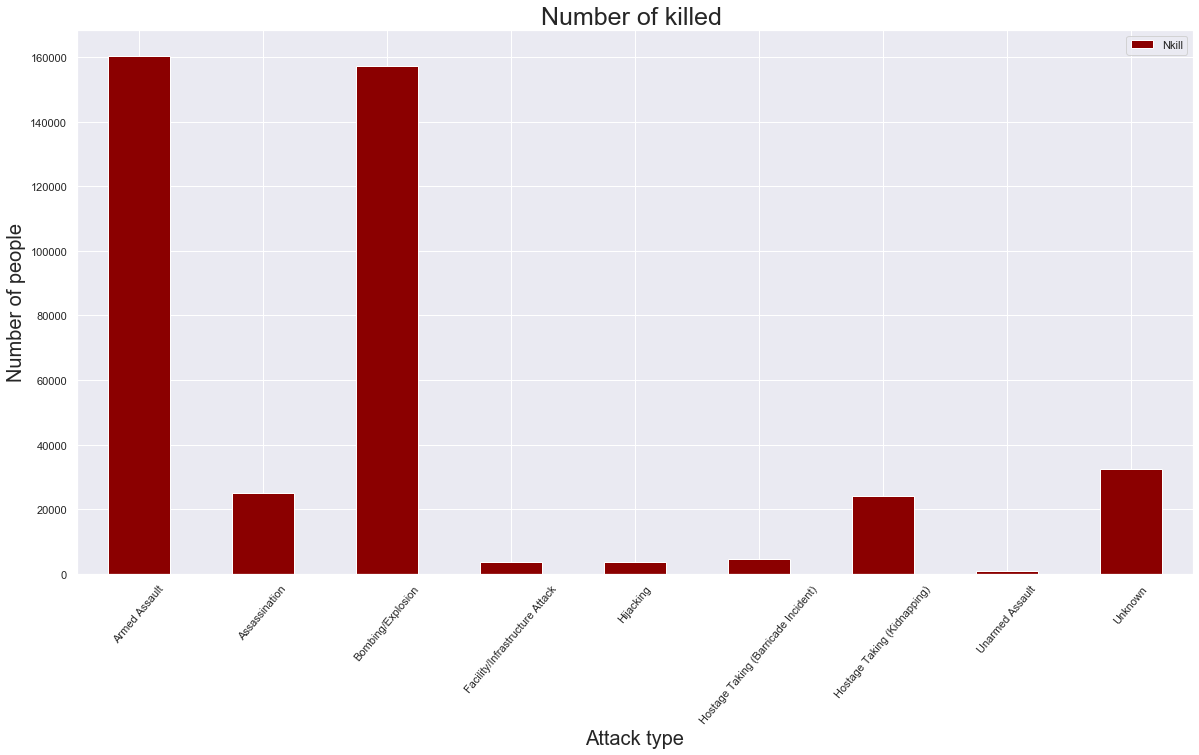

In [ ]:
Data[['Attacktype','Nkill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['darkred'])
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=25)
plt.ylabel('Number of people',fontsize=20)
plt.xlabel('Attack type',fontsize=20)
plt.show()

Here large number of people had lost their lives in Armed Assault followed by Others.

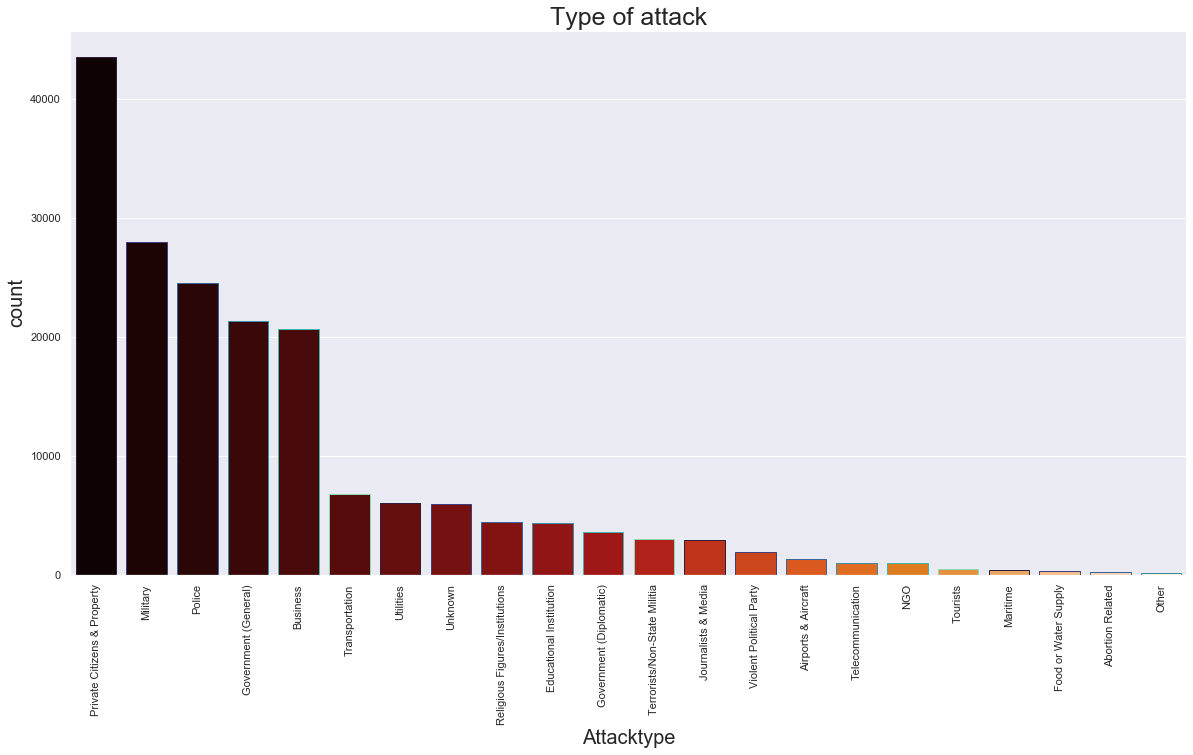

In [ ]:
plt.subplots(figsize=(20,10))
sns.countplot(Data["Targtype"],order=Data['Targtype'].value_counts().index,palette="gist_heat",edgecolor=sns.color_palette("mako"));
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.title("Type of attack",fontsize=25)
plt.show()

here we observed that Private Citizen and Property Attacks were more as compared to other attack types.

In [ ]:
kill = Data.loc[:,'Nkill']
print('Number of people killed by terror attack:', int(sum(kill.dropna())))

Number of people killed by terror attack: 411868


In [ ]:
df = Data.pivot_table(columns='Attacktype', values='Nkill', aggfunc='sum')
df

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Nkill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [ ]:
df1 = Data.pivot_table(columns='Country', values='Nkill', aggfunc='sum')
df1

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Nkill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


In [ ]:
#top 10 countries with most number of attacks
attack = Data.Country.value_counts()[:10]
attack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [ ]:
#top 10 terrorist groups with most number of attacks
Data.Gname.value_counts()[1:11]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: Gname, dtype: int64

# Conclusion:-

1 . Taliban has done most number of attackd.


2 . 2014 is the most unlucky year because most of attacks are done in that year also most of people lost their lives in that year.

3 . Iraq is the most affected country with 24636 attacks.

4 . Bombing/Explosion type attack were used most of time.

5 . Private Citizen and Property Attacks were more as compared to other attack types.